In [22]:
from astropy.io import ascii, fits
import astropy
import pylab as plt
%matplotlib inline
from astropy import wcs
from astropy.table import Table,Column,join,hstack
from astropy.coordinates import SkyCoord,match_coordinates_sky
from astropy import units as u
import pymoc
import glob
from time import sleep
import os
from astropy.cosmology import WMAP9 as cosmo

import numpy as np
import xidplus
from xidplus import moc_routines
import pickle
import xidplus.catalogue as cat

import sys
from herschelhelp_internal.utils import inMoc,flux_to_mag
from xidplus.stan_fit import SPIRE

import aplpy
import seaborn as sns
#sns.set(color_codes=True)
import pandas as pd
#sns.set_style("white")
import xidplus.posterior_maps as postmaps
from herschelhelp_internal.masterlist import merge_catalogues, nb_merge_dist_plot, specz_merge
import pyvo as vo
import time

In [26]:
ldust_lofar = Table.read('data/cigale_results/Ldust_prediction_results.fits')
ldust_lofar.rename_column('id','ID')
ldust_lofar[0]

ID,bayes.stellar.m_star,bayes.stellar.m_star_err,bayes.sfh.sfr10Myrs,bayes.sfh.sfr10Myrs_err,bayes.dust.luminosity,bayes.dust.luminosity_err,best.chi_square,best.reduced_chi_square,best.attenuation.Av_BC,best.attenuation.BC_to_ISM_factor,best.attenuation.bessell_b,best.attenuation.galex_fuv,best.attenuation.slope_BC,best.attenuation.slope_ISM,best.attenuation.stellar.old,best.attenuation.stellar.young,best.dust.alpha,best.dust.gamma,best.dust.luminosity,best.dust.mass,best.dust.qpah,best.dust.umin,best.lyc_absorption_f_dust,best.lyc_absorption_f_esc,best.sfh.age,best.sfh.burst_age,best.sfh.f_burst,best.sfh.integrated,best.sfh.sfr,best.sfh.sfr100Myrs,best.sfh.sfr10Myrs,best.sfh.tau_burst,best.sfh.tau_main,best.stellar.age_m_star,best.stellar.imf,best.stellar.lum_ly,best.stellar.lum_ly_old,best.stellar.lum_ly_young,best.stellar.m_gas,best.stellar.m_gas_old,best.stellar.m_gas_young,best.stellar.m_star,best.stellar.m_star_old,best.stellar.m_star_young,best.stellar.metallicity,best.stellar.n_ly,best.stellar.n_ly_old,best.stellar.n_ly_young,best.stellar.old_young_separation_age,best.universe.age,best.universe.luminosity_distance,best.universe.redshift,best.LBCBlue_Uspec,best.Bw_atmccd,best.R_atmccd,best.I_atmccd,best.suprime_FDCCD_z,best.LBCR_Y,best.jband,best.hband,best.K_atmccd,best.kband,best.IRAC_ch1_total_response,best.IRAC_ch2_total_response,best.IRAC_ch3_total_response,best.IRAC_ch4_total_response
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0,10862150070.795803,5208106773.029268,90.42206225194215,52.50035150633097,1.4233905778179362e+38,8.569804067617513e+37,5.461967107916011,1.3654917769790027,0.3,0.8,0.5966246620337797,1.3027219175711258,-0.7,-0.7,3.298389860592665e+36,1.858531250115003e+38,2.0,0.02,1.8915151487209295e+38,2.1820534657714964e+38,3.9,25.0,0.0,0.0,1000.0,10.0,0.3,4555457197.25198,142.29262959628488,19.16344452671448,142.33697806309743,10000.0,3000.0,213.2940149181003,1.0,5.758473555544264e+37,8.609939773322722e+33,5.757612561566932e+37,1103936320.8153498,1011456140.5667195,92480180.24863026,3451519916.8887215,2120631276.054285,1330888640.834437,0.02,1.7634553545485656e+55,3.0909141196575916e+51,1.7631462631365998e+55,10.0,1736.9192589511292,1.0297468090667977e+27,3.69,0.0,0.00013354402473144983,0.001151407961670901,0.0012394285229754497,0.0013060810607579952,0.0013584117940919033,0.0013092390523297118,0.0011772509622629912,0.0013339478671344166,0.0013432679051871468,0.001130864124030483,0.0012108925208654355,0.0012611917168313222,0.0013237516637872055


In [23]:
lofar_cat = Table.read('data/photz/Bootes_opt_spitzer_merged_vac_opt3as_irac4as_all_hpx_public.fits')
lofar_cat[0]

In [34]:
ldust_lofar = join(lofar_cat[~lofar_cat['ID'].mask],ldust_lofar,keys='ID',join_type='inner')

In [35]:
ldust_lofar[0]

ID,ID_OPTICAL,ID_SPITZER,RA,DEC,help_id,RA_HELP,DEC_HELP,EBV,Z_SPEC,Z_SOURCE,Z_QUAL,RA_ZSPEC,DEC_ZSPEC,REL,OBJID,CLASS_STAR,FLAG_DEEP,FLAG_OVERLAP,FLAG_CLEAN,FUV_flux,FUV_fluxerr,NUV_flux,NUV_fluxerr,u_flux,u_fluxerr,Bw_flux,Bw_fluxerr,R_flux,R_fluxerr,I_flux,I_fluxerr,z_flux,z_fluxerr,z_Subaru_flux,z_Subaru_fluxerr,y_flux,y_fluxerr,J_flux,J_fluxerr,H_flux,H_fluxerr,K_flux,K_fluxerr,Ks_flux,Ks_fluxerr,ch1_flux,ch1_fluxerr,ch2_flux,ch2_fluxerr,ch3_flux,ch3_fluxerr,ch4_flux,ch4_fluxerr,F_MIPS_24,FErr_MIPS_24_u,FErr_MIPS_24_l,Bkg_MIPS_24,Sig_conf_MIPS_24,Rhat_MIPS_24,n_eff_MIPS_24,Pval_res_24,flag_mips_24,F_PACS_100,FErr_PACS_100_u,FErr_PACS_100_l,F_PACS_160,FErr_PACS_160_u,FErr_PACS_160_l,Bkg_PACS_100,Bkg_PACS_160,Sig_conf_PACS_100,Sig_conf_PACS_160,Rhat_PACS_100,Rhat_PACS_160,n_eff_PACS_100,n_eff_PACS_160,Pval_res_100,Pval_res_160,flag_PACS_100,flag_PACS_160,F_SPIRE_250,FErr_SPIRE_250_u,FErr_SPIRE_250_l,F_SPIRE_350,FErr_SPIRE_350_u,FErr_SPIRE_350_l,F_SPIRE_500,FErr_SPIRE_500_u,FErr_SPIRE_500_l,Bkg_SPIRE_250,Bkg_SPIRE_350,Bkg_SPIRE_500,Sig_conf_SPIRE_250,Sig_conf_SPIRE_350,Sig_conf_SPIRE_500,Rhat_SPIRE_250,Rhat_SPIRE_350,Rhat_SPIRE_500,n_eff_SPIRE_250,n_eff_SPIRE_500,n_eff_SPIRE_350,Pval_res_250,Pval_res_350,Pval_res_500,flag_spire_250,flag_spire_350,flag_spire_500,AGN,optAGN,IRAGN,AGN_ZSPEC,XrayAGN,XrayFlux_0.5-2,XrayHardness,z1_median,z1_min,z1_max,z1_area,z2_median,z2_min,z2_max,z2_area,nfilt_eazy,nfilt_atlas,nfilt_ananna,chi_r_best,chi_r_stellar,stellar_type,hp_idx_11,hp_depth_cluster,bayes.stellar.m_star,bayes.stellar.m_star_err,bayes.sfh.sfr10Myrs,bayes.sfh.sfr10Myrs_err,bayes.dust.luminosity,bayes.dust.luminosity_err,best.chi_square,best.reduced_chi_square,best.attenuation.Av_BC,best.attenuation.BC_to_ISM_factor,best.attenuation.bessell_b,best.attenuation.galex_fuv,best.attenuation.slope_BC,best.attenuation.slope_ISM,best.attenuation.stellar.old,best.attenuation.stellar.young,best.dust.alpha,best.dust.gamma,best.dust.luminosity,best.dust.mass,best.dust.qpah,best.dust.umin,best.lyc_absorption_f_dust,best.lyc_absorption_f_esc,best.sfh.age,best.sfh.burst_age,best.sfh.f_burst,best.sfh.integrated,best.sfh.sfr,best.sfh.sfr100Myrs,best.sfh.sfr10Myrs,best.sfh.tau_burst,best.sfh.tau_main,best.stellar.age_m_star,best.stellar.imf,best.stellar.lum_ly,best.stellar.lum_ly_old,best.stellar.lum_ly_young,best.stellar.m_gas,best.stellar.m_gas_old,best.stellar.m_gas_young,best.stellar.m_star,best.stellar.m_star_old,best.stellar.m_star_young,best.stellar.metallicity,best.stellar.n_ly,best.stellar.n_ly_old,best.stellar.n_ly_young,best.stellar.old_young_separation_age,best.universe.age,best.universe.luminosity_distance,best.universe.redshift,best.LBCBlue_Uspec,best.Bw_atmccd,best.R_atmccd,best.I_atmccd,best.suprime_FDCCD_z,best.LBCR_Y,best.jband,best.hband,best.K_atmccd,best.kband,best.IRAC_ch1_total_response,best.IRAC_ch2_total_response,best.IRAC_ch3_total_response,best.IRAC_ch4_total_response
,,,deg,deg,,deg,deg,,,,,,,,,,,,,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,muJy,muJy,muJy,MJy / sr,MJy / sr,,,,,mJy,mJy,mJy,mJy,mJy,mJy,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,,,,,,,,,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,deg,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy
int64,int64,int64,float64,float64,bytes27,float64,float64,float32,float64,int64,int64,float64,float64,float64,bytes25,float32,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,bool,float32,float32,float32,float32,float32,float32,float32,float32,float32,flo

In [19]:
help_masterlist = Table.read('../../../../../HELP/dmu_products/dmu32/dmu32_Bootes/data/Bootes.fits')

ldust_help = Table.read('')

In [12]:
ldust = ldust_lofar['bayes.dust.luminosity']#/3.8E26

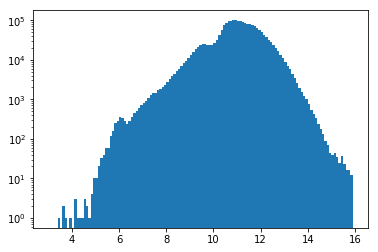

In [7]:
bins = np.arange(3,16,0.1)
y = np.log10(ldust)
plt.hist(y,bins=bins,log=True)
plt.show()

number of sources in prior list is : 525077


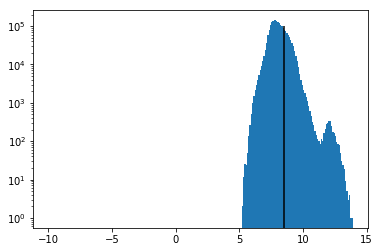

number of prior sources from help masterlist is: 495159


In [21]:
dist = ldust_lofar['best.universe.luminosity_distance']
ldust_flux = ldust/(4*np.pi*dist)/100

mask = ldust_flux>10**8.5
print('number of sources in prior list is : {}'.format(np.sum(mask)))

bins = np.arange(-10,14,0.1)
y = np.log10(ldust_flux)
plt.hist(y,bins=bins,log=True)
plt.vlines(8.5,ymin=0,ymax=1E5)
plt.show()

mips_mask = (help_masterlist['flag_optnir_det']>=5) & (help_masterlist['f_mips_24']>20)
print('number of prior sources from help masterlist is: {}'.format(np.sum(mips_mask)))

In [36]:
ldust_coords = SkyCoord(ldust_lofar['RA'],ldust_lofar['DEC'],unit='deg')
help_coords = SkyCoord(help_masterlist['ra'],help_masterlist['dec'],unit='deg')
idx,ang,d3d = match_coordinates_sky(ldust_coords,help_coords)

In [44]:
ldust_x_help = hstack([ldust_lofar,help_masterlist[idx]])

In [45]:
mask = ~np.isnan(ldust_x_help['f_spire_250'])
print('number of sources in prior list from HELP is: {}'.format(np.sum(mask)))

mask = ldust_flux>10**8.5
print('number of sources in prior list from ldust is: {}'.format(np.sum(mask)))

mask =(ldust_x_help['bayes.dust.luminosity']/(4*np.pi*ldust_x_help['best.universe.luminosity_distance'])/100>10**8.5) & (ldust_x_help['f_mips_24']>20)
print('number of sources in prior list from ldust and help is: {}'.format(np.sum(mask)))

number of sources in prior list from ldust is: 560822
number of sources in prior list from ldust is: 525077
number of sources in prior list from ldust and help is: 225096


In [47]:
ldust_coords = SkyCoord(ldust_lofar['RA'],ldust_lofar['DEC'],unit='deg')
mask = ~np.isnan(help_masterlist['f_spire_250'])
help_prior = help_masterlist[mask]
help_coords = SkyCoord(help_prior['ra'],help_prior['dec'],unit='deg')
radius = 5
idx_lofar, idx_help, d2d, d3d = help_coords.search_around_sky(
    ldust_coords, radius*u.arcsec)

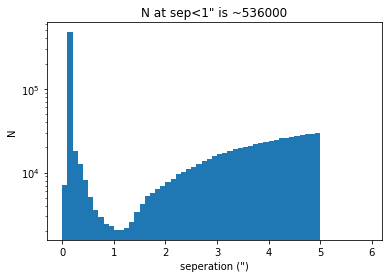

In [63]:
y = d2d.value*3600
bins=np.arange(0,6,0.1)
plt.hist(y,bins=bins,log=True)
plt.xlabel('seperation (")')
plt.ylabel('N')
plt.title('N at sep<1" is ~536000')
plt.show()

In [53]:
np.sum((d2d.value*3600)<1)

536021

In [57]:
idx_lofar

array([    182,     356,     408, ..., 2133539, 2133545, 2133546])

In [58]:
idx_help

array([ 80289,  68782,  81795, ..., 438273, 423410, 417290])

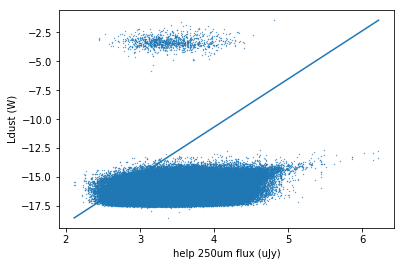

In [62]:
x = np.log10(help_prior['f_spire_250'][idx_help])
y = np.log10(ldust_lofar[idx_lofar]['bayes.dust.luminosity']/(4*np.pi*ldust_lofar[idx_lofar]['best.universe.luminosity_distance']**2))
plt.scatter(x,y,s=0.1)
plt.xlabel('help 250um flux (uJy)')
plt.ylabel('Ldust (W)')

plt.plot([np.min(x),np.max(x)],[np.min(y),np.max(y)])
plt.show()